In [1]:
import numpy as np
import matplotlib.pyplot as plt
from iterativeClustering import clusterings_with_hors, bfs_merge
from cluster import build_seqs_distance_matrix, distance_values, get_seq_as_txt
from extractFeatures import extract_features_from_labels
from Bio import SeqIO
from Bio.SeqFeature import SeqFeature, FeatureLocation 
from Bio import Phylo
from Bio import AlignIO
from Bio import Align
import json
from showHOR import show_hor, show_hors, show_hor_tree
import hammingdist
import platform
import math
import csv
from bedFileAsFeatures import BED_file_to_features
from featureToSeq import feature_to_seq


In [2]:
references = {seq.id : seq for seq in SeqIO.parse("./data/monomers/chr2_centromere_plus2Mb.fasta", "fasta")}

In [3]:
monomers_as_features = BED_file_to_features("./data/monomers/chr2_StringDecMon2extr_noMorgante.bed")

In [4]:
[(feature.location.start, feature.__len__()) for feature in monomers_as_features if feature.__len__() < 70]

[(ExactPosition(1985104), 60),
 (ExactPosition(2373213), 58),
 (ExactPosition(2380415), 59),
 (ExactPosition(2482806), 60),
 (ExactPosition(2488408), 60),
 (ExactPosition(2723085), 60),
 (ExactPosition(2746370), 68),
 (ExactPosition(3014699), 55)]

In [5]:
# sample monomers for testing purposes (comment out for complete analysis)

sample_size = 60
num_samples = 5

sample_page = len(monomers_as_features) // num_samples
sample_offset = (sample_page - sample_size) // 2

def slice_seq(seq, position, length):
    return seq[position : position + length]

monomers_as_features = [
    monomer
    for sample_index in range(num_samples)
    for monomer in slice_seq(monomers_as_features, sample_index * sample_page + sample_offset, sample_size)
]

In [6]:
monomers_as_seqs = [feature_to_seq(feature, references) for feature in monomers_as_features]

In [7]:
monomer_dists = build_seqs_distance_matrix(monomers_as_seqs)

In [8]:
def max_len(strings):
    return max([len(s) for s in strings])

(array([2.800e+02, 2.890e+02, 2.850e+02, 3.080e+02, 2.700e+02, 2.850e+02,
        3.780e+02, 5.220e+02, 5.770e+02, 6.030e+02, 5.810e+02, 6.930e+02,
        7.510e+02, 8.220e+02, 8.190e+02, 1.038e+03, 9.040e+02, 9.120e+02,
        8.800e+02, 7.540e+02, 5.940e+02, 4.850e+02, 4.430e+02, 2.510e+02,
        1.770e+02, 2.120e+02, 1.640e+02, 2.840e+02, 3.700e+02, 5.970e+02,
        7.020e+02, 7.130e+02, 7.990e+02, 9.940e+02, 8.060e+02, 8.400e+02,
        8.020e+02, 1.154e+03, 1.649e+03, 2.235e+03, 2.988e+03, 2.976e+03,
        2.668e+03, 2.032e+03, 2.077e+03, 1.734e+03, 1.330e+03, 9.290e+02,
        6.180e+02, 3.390e+02, 3.210e+02, 1.700e+02, 1.350e+02, 1.250e+02,
        6.000e+01, 3.200e+01, 2.800e+01, 2.300e+01, 1.300e+01, 2.100e+01,
        5.000e+00, 2.000e+00, 0.000e+00, 2.000e+00]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
        26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36

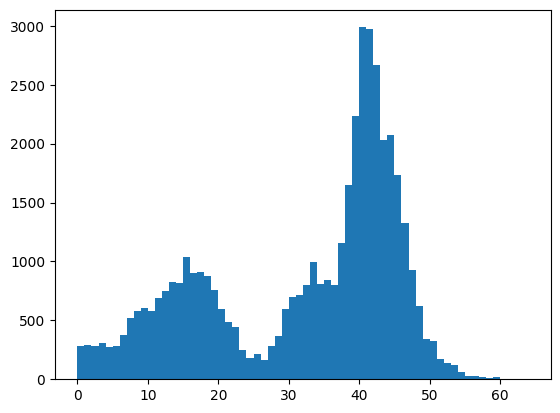

In [9]:
dist_values = distance_values(monomer_dists)
plt.hist(dist_values, bins=int(max(dist_values)))


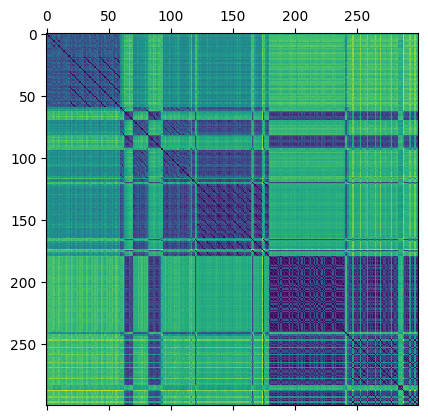

In [10]:
plt.matshow(monomer_dists)

In [11]:
clusterings, tree, hors, hor_tree_roots = clusterings_with_hors(monomers_as_seqs, seqs_as_features=monomers_as_features, distance_matrix=monomer_dists, min_len_loop=1, min_loop_reps=3)

Start of clusterings_with_hors
merge_clusters with distance as (300, 300), clusters as (), and max distance 0
adjacency matrix sparsity is 0.9904444444444445
merge_clusters with distance as (172, 172), clusters as (172, 300), and max distance 1
adjacency matrix sparsity is 0.9915494862087615
merge_clusters with distance as (134, 134), clusters as (134, 300), and max distance 2
adjacency matrix sparsity is 0.990198262419247
merge_clusters with distance as (114, 114), clusters as (114, 300), and max distance 3
adjacency matrix sparsity is 0.9899969221298861
merge_clusters with distance as (106, 106), clusters as (106, 300), and max distance 4
adjacency matrix sparsity is 0.9884300462798149
merge_clusters with distance as (94, 94), clusters as (94, 300), and max distance 5
adjacency matrix sparsity is 0.9864191942055228
merge_clusters with distance as (81, 81), clusters as (81, 300), and max distance 6
adjacency matrix sparsity is 0.9839963420210334
Looking for loops in Num clusters: 69, 

In [12]:
[
    [str(loop)
    for loop in clustering.loops]
    for clustering in clusterings
]

[['ddtd*d*t in [2:43]', 'i in [8:11]', 'ddtd*d*t in [2:43]', 'i in [8:11]'],
 ['RSTUVWXYZabc in [19:60]',
  'ddddddwd in [2:45]',
  'i in [8:11]',
  'RSTUVWXYZabc in [19:60]',
  'd in [10:13],[51:55]',
  'd in [2:8],[9:16],[17:24],[25:32],[33:40],[41:45],[48:54],[57:60]',
  'ddddddwd in [2:45]',
  'i in [1:7],[10:16],[19:23],[29:33],[39:42],[45:51],[54:60]',
  'i in [8:11]'],
 ['I in [21:24],[33:36],[45:48],[57:60]',
  'IPIIIEIIEJQM in [19:60]',
  'R in [0:3],[10:22],[34:57]',
  'T in [4:7],[23:26],[27:31]',
  'R in [2:8],[9:16],[17:24],[25:32],[33:40],[41:45],[48:54],[57:60]',
  'RRRRRRZR in [2:45]',
  'T in [0:60]',
  'T in [4:7],[8:13],[14:19],[20:25],[26:29],[30:38],[39:44],[49:53],[54:57]',
  'TTTcTT in [4:29]']]

In [13]:
[
    str(clustering)
    for clustering in clusterings
]

["Num clusters: 69, Seqs: ['ABCDEFGHEIGJKLMNOPQRSTUVWXYZabcRSTUVWXYZabcRSTUVWXYZabcRSTUV', 'defghiijklmddefdenodefghiijkliipqrdenddesdenodeftuvtuddwfxyz', '**ddtd*d*tddtd*d*tddtd*d*tddtd*d*tddtd*d*td*d***ddtd*d***ddt', '*iiiiii*i*iiiiii*i*iiii*ii*i*iiii*ii*i*iii*i*iiiiii*i*iiiiii', '****i*i*iii*i*ii**i*i*i*i*i*i*ii**ii*i*ii**i******i*i*i*i*ii'], Loops: ['ddtd*d*t in [2:43]', 'i in [8:11]', 'ddtd*d*t in [2:43]', 'i in [8:11]']",
 "Num clusters: 62, Seqs: ['ABCDEFGHEIGJKLMNOPQRSTUVWXYZabcRSTUVWXYZabcRSTUVWXYZabcRSTUV', 'defghiijkldddefdemndefghiijkliiopqdemddefdemndefddrddddefsmt', 'uvddddddwdddddddwdddddddwdddddddwdddddddwddddxuvddddddyuvddd', 'ziiiiiiziziiiiiiziziiiiziiziziiiiziiziziiiziziiiiiiziziiiiii', '****i*i*iiizi*iiz*i*i*i*i*i*i*iiz*iizi*iiz*i******i*i*i*i*ii'], Loops: ['RSTUVWXYZabc in [19:60]', 'ddddddwd in [2:45]', 'i in [8:11]', 'RSTUVWXYZabc in [19:60]', 'd in [10:13],[51:55]', 'd in [2:8],[9:16],[17:24],[25:32],[33:40],[41:45],[48:54],[57:60]', 'ddddddwd in [2:45]', 'i in 

In [19]:
hor_tree_roots

In [14]:
show_hor_tree(hor_tree_root, tree)

AttributeError: 'HORInSeq' object has no attribute 'sub_hors'

None


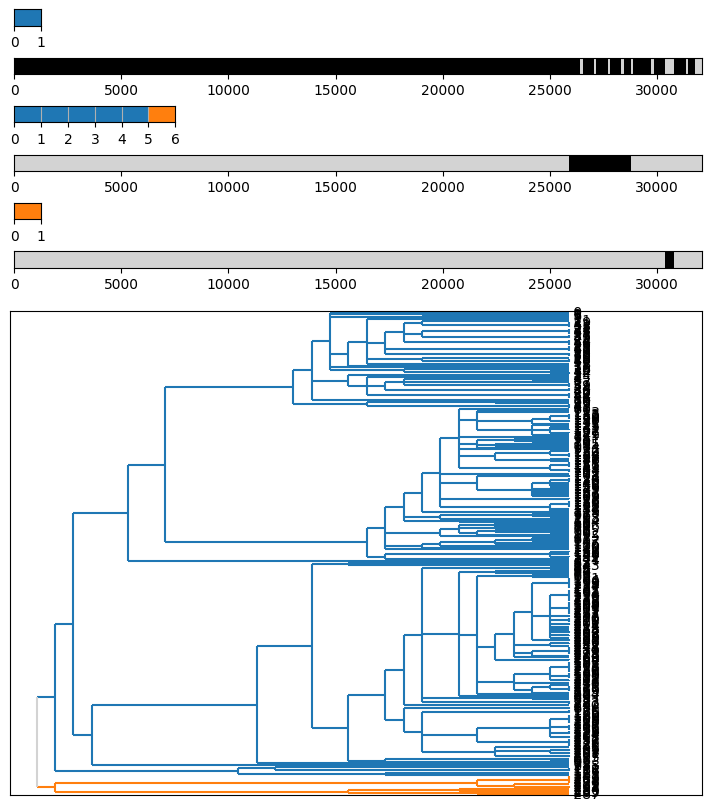

In [ ]:
show_hors(hor_tree_root.sub_hors, tree)

In [ ]:
actual_hors = [hor for hor in hors if len(hor.hor.clade_seq) > 1]

In [ ]:
tree_output_filename = f'data/vitis/clusterings/{seq_record.id.replace(":","_")}.tree.xml'
Phylo.write(tree, tree_output_filename, format='phyloxml')

NameError: name 'seq_record' is not defined